### Import Necessary Modules

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

### Generating the Dataset

shape of the x: (400, 2)
shape of the y: (400,)


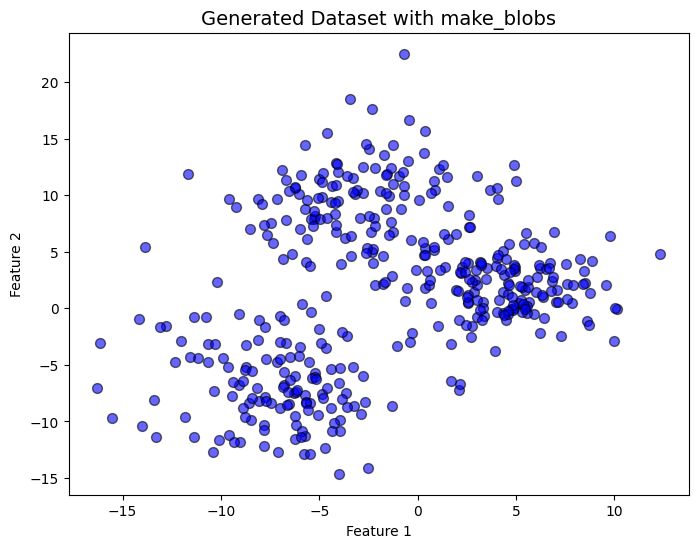

In [55]:
# Generate the dataset
X, y = make_blobs(n_samples=400, centers=3, cluster_std=[3.5,2.5,3.5], random_state=42)

print(f"shape of the x: {X.shape}")
print(f"shape of the y: {y.shape}")

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50, alpha=0.6, edgecolors='k')
plt.title("Generated Dataset with make_blobs", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Draw elipse

In [56]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse for 1, 2, and 3 standard deviations
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))


### GMM

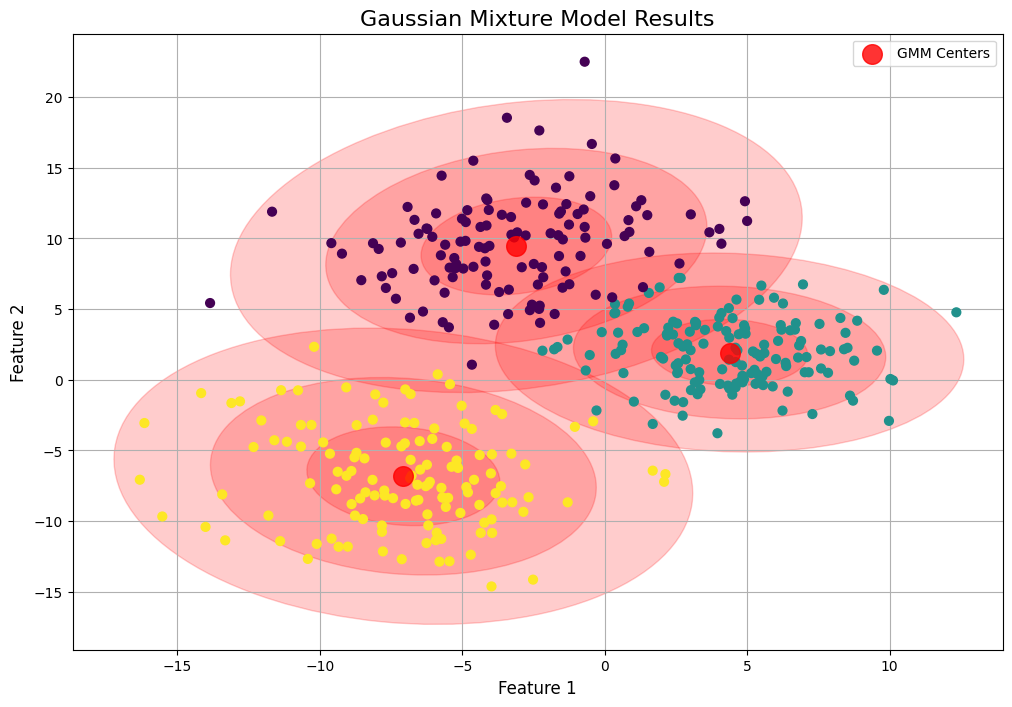

In [57]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
y_gmm = gmm.predict(X)

# visualization
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the data points colored by their GMM-assigned cluster
ax.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='viridis', zorder=2)

# Plot the cluster centers found by the GMM
centers = gmm.means_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, zorder=3, label='GMM Centers')

# Plot the ellipses representing the covariance of each Gaussian component
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, ax=ax, alpha=0.2, color='red')

plt.title('Gaussian Mixture Model Results', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()